# Taller Machine
Parte 1: Clasificación Supervisada

Precisión del arbol de decision: 1.00
Precisión del bosque aleatorio: 1.00
Precisión del clasificador SVM: 1.00


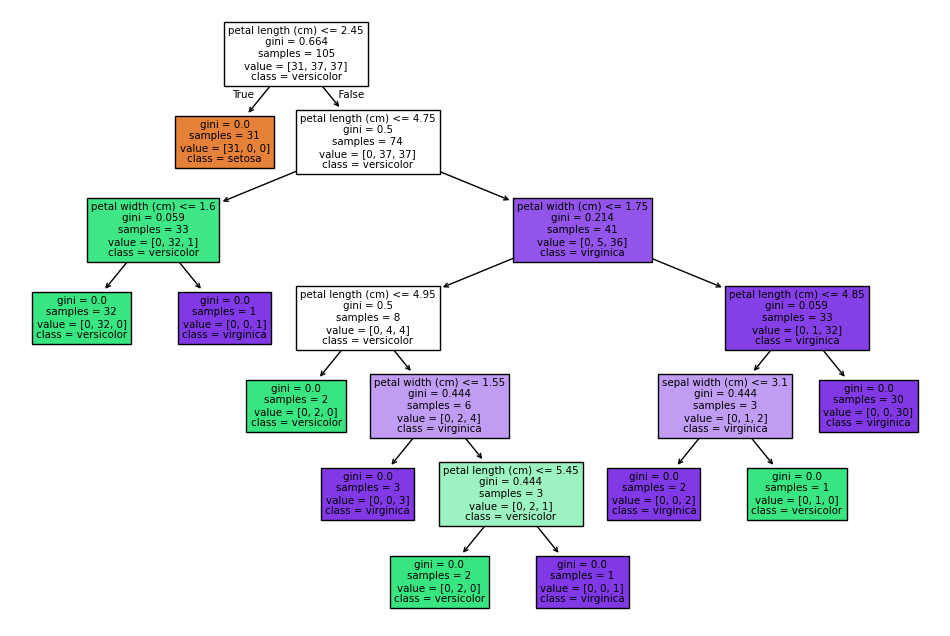

In [39]:
# importar librerías
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1 cargar el dataset
iris = load_iris()  
x = iris.data  
y = iris.target  

# 2 dividir el dataset en conjunto de entrenamiento y conjunto de prueba
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)


# 3 - 4
# A. Modelo de arbol de decisión
Dt = DecisionTreeClassifier(random_state=42)  # variable Dt= Decision Tree
Dt.fit(x_train, y_train)  

# predecir con datos de prueba
y_pred = Dt.predict(x_test)  # predecir la clase de las flores en el conjunto de prueba

# evaluar exactitud
accuracy = (y_pred == y_test).mean()  # calcular la precisión del modelo
print(f"Precisión del arbol de decision: {accuracy:.2f}")  


# B. Random Forest
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100, random_state=42)  
random.fit(x_train, y_train) 

#predecir con datos de prueba
y_pred_rd = random.predict(x_test)  

#evaluar exactitud
accuracy_rd = (y_pred_rd == y_test).mean() 
print(f"Precisión del bosque aleatorio: {accuracy_rd:.2f}") 

# C. SVM 
from sklearn.svm import SVC # importar el clasificador de máquinas de soporte vectorial
import numpy as np  

# probe comprarando una a unas las 3 categorias sin colocar lo binario
#idx= np.where(y != 2) 
#x_binary = x[idx]  # filtrar las características para las dos clases
#y_binary = y[idx]  # filtrar las etiquetas para las dos clases

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)  # dividir el dataset en conjunto de entrenamiento y conjunto de prueba

# crear el modelo SVC
svm= SVC(kernel='rbf',gamma=0.1)  # crea el clasificador SVM - kernel (Radial basis Function) tipo no lineal, con parametro igual a 0.1
svm.fit(x_train, y_train)  

# predecir con datos de prueba
y_pred_svm = svm.predict(x_test)  

# evaluar exactitud
accuracy_svm = (y_pred_svm == y_test).mean()  
print(f"Precisión del clasificador SVM: {accuracy_svm:.2f}")

# 5 Visualizar el árbol de decisión
plt.figure(figsize=(12, 8)) 
plot_tree(
    Dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True
)
plt.show()

## Parte 2: Clustering no supervisado

En este hice comparacion con dos caracteristicas y la y con todos los datos

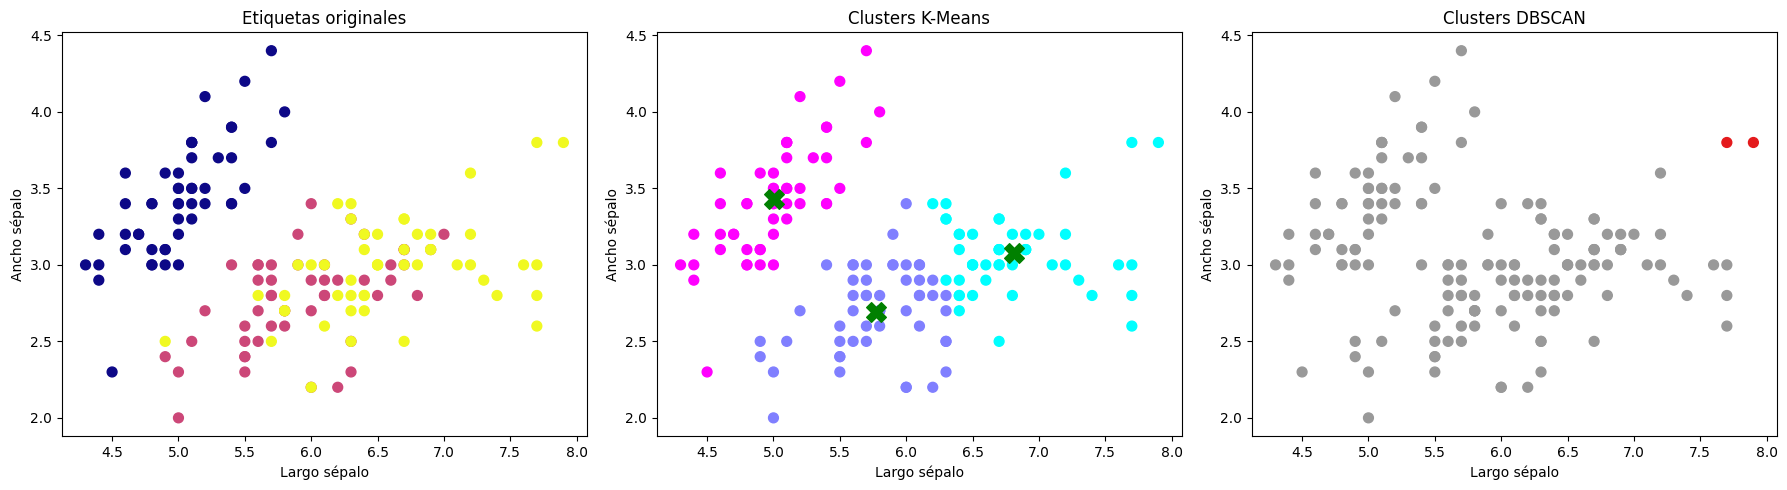

Comparación con KMeans:
ARI: 0.60
NMI: 0.65
Comparación con DBSCAN:
ARI: 0.00
NMI: 0.03


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Seleccionar solo las dos primeras características
iris = load_iris()
x2 = iris.data[:, :2]  
y = iris.target

#kmeans
from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(x2)
centroids = kmeans.cluster_centers_

# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(x2)


#visualizacion datos iniciales
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Visualización de los datos originales
axs[0].scatter(x2[:, 0], x2[:, 1], c=y, cmap='plasma', s=50)
axs[0].set_title("Etiquetas originales")
axs[0].set_xlabel("Largo sépalo")
axs[0].set_ylabel("Ancho sépalo")

# Visualización kmeans
axs[1].scatter(x2[:, 0], x2[:, 1], c=labels_kmeans, cmap='cool', s=50) 
axs[1].scatter(centroids[:, 0], centroids[:, 1], c='green', s=200, marker='X')
axs[1].set_title("Clusters K-Means")
axs[1].set_xlabel("Largo sépalo")
axs[1].set_ylabel("Ancho sépalo")

# Visualización DBSCAN
axs[2].scatter(x2[:, 0], x2[:, 1], c=labels_dbscan, cmap='Set1', s=50)
axs[2].set_title("Clusters DBSCAN")
axs[2].set_xlabel("Largo sépalo")
axs[2].set_ylabel("Ancho sépalo")

plt.tight_layout()
plt.show()

#  Métricas de comparación
# Ari = Compara estructura de agrupamientos
# NMI= Compara contenido general entre clases
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

print("Comparación con KMeans:")
print(f"ARI: {adjusted_rand_score(y,labels_kmeans):.2f}") #Compara estructura de agrupamientos
print(f"NMI: {normalized_mutual_info_score(y, labels_kmeans):.2f}") #Compara contenido general entre clases

print("Comparación con DBSCAN:")
print(f"ARI: {adjusted_rand_score(y, labels_dbscan):.2f}")
print(f"NMI: {normalized_mutual_info_score(y, labels_dbscan):.2f}")


 Ejercicio donde los datos que comparo son todos de las dos primeras caracteristicas, tanto en x como y

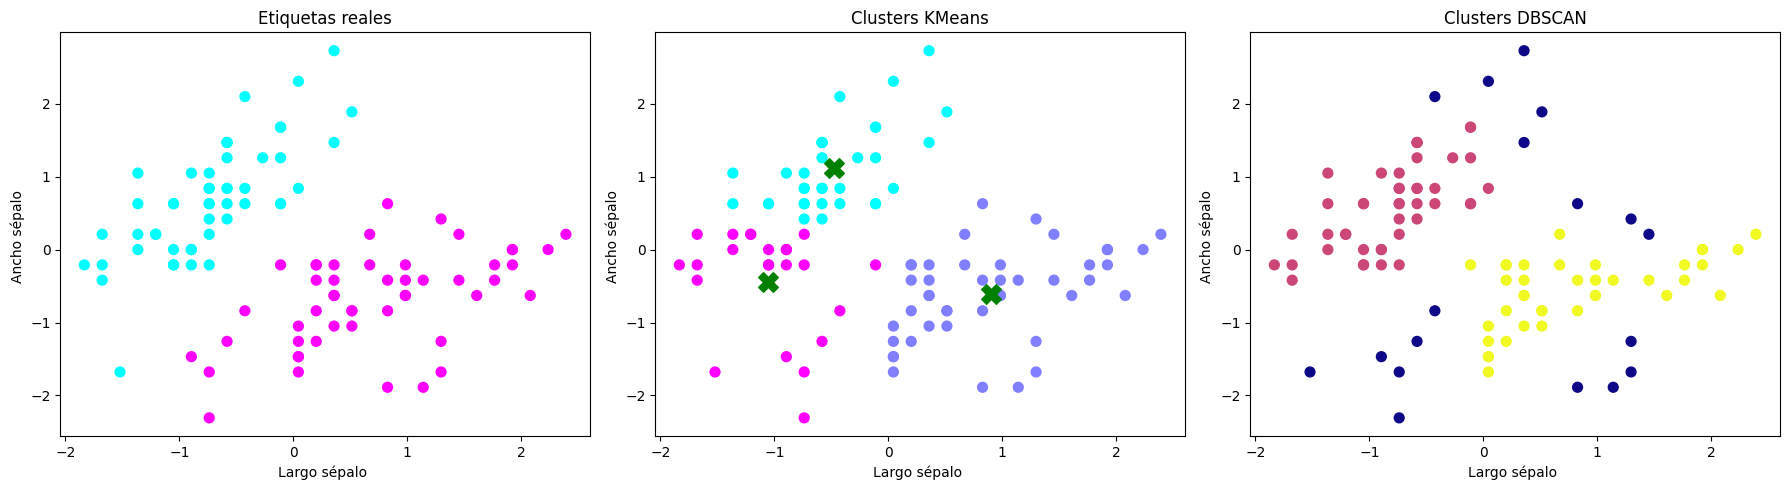

Comparación de clusters con etiquetas reales
KMeans → ARI: 0.62 | NMI: 0.64
DBSCAN → ARI: 0.68 | NMI: 0.67


In [41]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

#  Cargar datos y filtrar clases 0 y 1
iris = load_iris()
X = iris.data[:, :2]  # Solo las dos primeras características
y = iris.target

mask = y != 2
X_filtered = X[mask]
y_filtered = y[mask]

# Escalar datos
scaler = StandardScaler()  #para estandarizar las características
X_scaled = scaler.fit_transform(X_filtered)

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_


# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

#  Visualizar resultados

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Datos originales escalados
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_filtered, cmap='cool', s=50)
axs[0].set_title("Etiquetas reales")
axs[0].set_xlabel("Largo sépalo ")
axs[0].set_ylabel("Ancho sépalo ")

# KMeans
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='cool', s=50)
axs[1].scatter(centroids[:, 0], centroids[:, 1], c='green', s=200, marker='X')
axs[1].set_title("Clusters KMeans")
axs[1].set_xlabel("Largo sépalo ")
axs[1].set_ylabel("Ancho sépalo ")

# DBSCAN
axs[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='plasma', s=50)
axs[2].set_title("Clusters DBSCAN")
axs[2].set_xlabel("Largo sépalo ")
axs[2].set_ylabel("Ancho sépalo ")

plt.tight_layout()
plt.show()

#  Métricas de comparación
# Ari = Compara estructura de agrupamientos
# NMI= Compara contenido general entre clases
ari_kmeans = adjusted_rand_score(y_filtered, labels_kmeans) #y_filtered contiene las etiquetas reales de las clases 0 y 1
nmi_kmeans = normalized_mutual_info_score(y_filtered, labels_kmeans)

ari_dbscan = adjusted_rand_score(y_filtered, labels_dbscan)
nmi_dbscan = normalized_mutual_info_score(y_filtered, labels_dbscan)

print("Comparación de clusters con etiquetas reales")
print(f"KMeans → ARI: {ari_kmeans:.2f} | NMI: {nmi_kmeans:.2f}")
print(f"DBSCAN → ARI: {ari_dbscan:.2f} | NMI: {nmi_dbscan:.2f}")

## Preguntas y Respuesta:
- **¿Cuál modelo supervisado tuvo mejor precisión? ¿Por qué?**  
  Random Forest suele ser el mejor en precisión porque puede generalizar al combinar muchos árboles, pero en este ejercicio todos tuvieron una precisión del 100%.
- **¿Cómo se relacionan los clusters de K-Means con las clases reales?**  
  K-Means agrupa datos sin usar etiquetas reales, pero en datasets como Iris, los clusters pueden coincidir en gran medida con las clases reales. Aunque los números de clusters no coinciden con las clases reales, la forma de agrupar puede reflejar la estructura subyacente de las clases
- **¿Qué utilidad tiene DBSCAN en comparación con KMeans?**  
  DBSCAN es útil cuando los clústeres tienen formas irregulares o cuando hay ruido, mientras que KMeans funciona mejor con clústeres de forma circular y de tamaño similar.
- **¿Qué ventajas y desventajas tiene un árbol de decisión frente a un Random Forest?**  
  Un solo árbol es útil cuando se necesita interpretabilidad, ya que es simple, rápido de entrenar e interpretable; pero Random Forest es más fiable para predicción, ya que tiene mayor precisión y es robusto ante el ruido y la variabilidad.
- **¿Cómo ayuda la visualización del árbol para interpretar el modelo?**  
  La visualización facilita la explicación del modelo a usuarios no técnicos y permite auditoría y confianza en decisiones críticas.

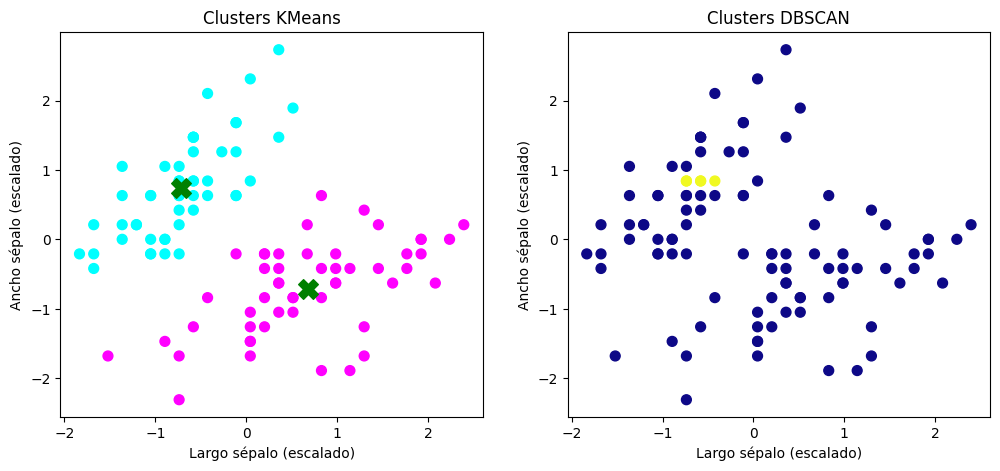

In [42]:
# otros ejemplos para comparar

#  Aplicar KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_


#  Aplicar DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# KMeans
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='cool', s=50)
axs[0].scatter(centroids[:, 0], centroids[:, 1], c='green', s=200, marker='X')
axs[0].set_title("Clusters KMeans")
axs[0].set_xlabel("Largo sépalo (escalado)")
axs[0].set_ylabel("Ancho sépalo (escalado)")

# DBSCAN
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='plasma', s=50)
axs[1].set_title("Clusters DBSCAN")
axs[1].set_xlabel("Largo sépalo (escalado)")
axs[1].set_ylabel("Ancho sépalo (escalado)")


plt.show()
